In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## Data

In [2]:
np.random.seed(6)
torch.manual_seed(0)
x0 = np.random.randn(100,2) * 0.35 + np.array([-0.7,1])
x1 = np.random.randn(100,2) * 0.35 + np.array([0,-0.5])
x2 = np.random.randn(100,2) * 0.35 + np.array([0.7,1])
x3 = np.random.randn(10,2) * 0.8

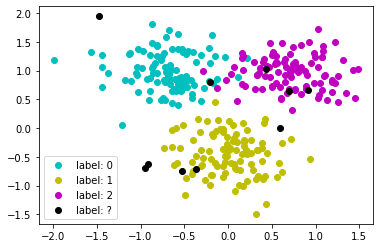

In [3]:
plt.scatter(x0[:,0], x0[:,1], c='c', label='label: 0')
plt.scatter(x1[:,0], x1[:,1], c='y', label='label: 1')
plt.scatter(x2[:,0], x2[:,1], c='m', label='label: 2')
plt.scatter(x3[:,0], x3[:,1], c='k', label='label: ?')
plt.legend()

In [4]:
X = np.concatenate([x0, x1, x2])
y = np.array([0]*100 + [1]*100 + [2]*100)

## Softmax

$$ P(class=i) = \frac{e^i}{\sum e^i} $$

In [5]:
def softmax(X):
    max_X, _ = torch.max(X, dim=1, keepdim=True)
    X = X - max_X
    exp_X = torch.exp(X)
    return exp_X / exp_X.sum(dim=1, keepdim=True)

In [6]:
t = torch.Tensor([[1, 2, 5],[2, 2, 2]])
out = softmax(t)
print(out)
print(out.sum(dim=1))

tensor([[0.0171, 0.0466, 0.9362],
        [0.3333, 0.3333, 0.3333]])
tensor([1., 1.])


## One-hot vector

In [7]:
n_class = 3
t = torch.LongTensor([1, 2, 0, 1])

In [8]:
def one_hot(y):
    y_one_hot = torch.zeros(len(y), n_class)
    return y_one_hot.scatter_(1, y.unsqueeze(1), 1)

one_hot(t)

tensor([[0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.]])

## Cross Entropy Loss

$$ L = \frac{1}{N} \sum - y \log(\hat{y}) $$

In [9]:
def cross_entropy(y_pred, y):
    return -torch.mean((y * torch.log(y_pred)).sum(dim=1))

## Implimentation

In [10]:
def MultiClassClassifier(X):
    return softmax(X @ W + b)

In [11]:
X_train = torch.Tensor(X)
y_train = torch.LongTensor(y)
X_test = torch.Tensor(x3)

n_class = 3
n_epochs = 1000
lr = 0.03

W = torch.zeros(2, n_class, requires_grad=True)
b = torch.zeros(n_class, requires_grad=True)

for epoch in range(n_epochs):
    
    y_pred = MultiClassClassifier(X_train)
    loss = cross_entropy(y_pred, one_hot(y_train))
    loss.backward()

    with torch.no_grad():
        
        # backward propagation
        for param in [W, b]:
            param -= lr * param.grad
            param.grad.data.zero_()

        # calculate accuracy
        acc = (y_pred.argmax(dim=1) == y_train).sum() / len(X_train) 

    if (epoch+1)%100 == 0:
        print(f'epoch:{epoch+1}   loss:{loss.item():.3f}   acc:{acc:.3f}')

epoch:100   loss:0.639   acc:0.947
epoch:200   loss:0.455   acc:0.960
epoch:300   loss:0.361   acc:0.963
epoch:400   loss:0.304   acc:0.973
epoch:500   loss:0.266   acc:0.977
epoch:600   loss:0.239   acc:0.977
epoch:700   loss:0.219   acc:0.977
epoch:800   loss:0.203   acc:0.977
epoch:900   loss:0.190   acc:0.980
epoch:1000   loss:0.179   acc:0.980


## Get prediction

In [12]:
with torch.no_grad():
    y_test = MultiClassClassifier(X_test).argmax(dim=1)

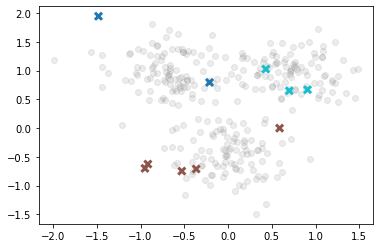

In [13]:
plt.scatter(X_train[:,0], X_train[:,1], c='grey', alpha =0.15)
plt.scatter(X_test[:,0], X_test[:,1], marker='x', s=50, lw=3, c=y_test, cmap='tab10')
plt.show()

## Using Pytorch libraries

In [14]:
import torch.nn as nn

class MultiClassClassifier(nn.Module):
    
    def __init__(self, nclass):
        super(MultiClassClassifier, self).__init__()
        self.layer = nn.Linear(2, n_class)

    def forward(self, X):
        out = self.layer(X)
        return out

In [15]:
from torch.optim import SGD

X_train = torch.Tensor(X)
y_train = torch.LongTensor(y)

n_class = 3
n_epochs = 1000
lr = 0.03

model = MultiClassClassifier(n_class)
optimizer = SGD(model.parameters(), lr=lr)
loss_fn = nn.CrossEntropyLoss()

for epoch in range(n_epochs):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        acc = torch.sum((y_pred.argmax(dim=1) == y_train).sum() / len(X_train))

    if (epoch+1)%100 == 0:
        print(f'epoch:{epoch+1}   loss:{loss.item():.3f}   acc:{acc:.3f}')

epoch:100   loss:0.567   acc:0.967
epoch:200   loss:0.413   acc:0.977
epoch:300   loss:0.335   acc:0.977
epoch:400   loss:0.286   acc:0.977
epoch:500   loss:0.253   acc:0.977
epoch:600   loss:0.229   acc:0.977
epoch:700   loss:0.211   acc:0.977
epoch:800   loss:0.196   acc:0.977
epoch:900   loss:0.185   acc:0.977
epoch:1000   loss:0.175   acc:0.980
